# Histograma

## Teoría
¿Qué es un histograma de imagen?
Es una representación gráfica de la distribución de intensidad de una imagen.
Cuantifica el número de píxeles para cada valor de intensidad considerado.

<img src="Imagenes_documento\Histogram_Equalization_Theory_0.jpg">

### ¿Qué es la ecualización de histogramas?
Es un método que mejora el contraste de una imagen, con el fin de estirar el rango de intensidad.
Para que quede más claro, en la imagen de arriba, puede ver que los píxeles parecen agrupados en la mitad del rango de intensidades disponible. Lo que hace Histogram Equalization es extender este rango. Fíjate en la siguiente figura: Los círculos verdes indican las intensidades despobladas . Después de aplicar la ecualización, obtenemos un histograma como el de la figura del centro. La imagen resultante se muestra en la imagen de la derecha.

<img src="Imagenes_documento\Histogram_Equalization_Theory_1.jpg">

### ¿Como funciona?
La ecualización implica mapear una distribución (el histograma dado) a otra distribución (una distribución más amplia y uniforme de valores de intensidad) para que los valores de intensidad se distribuyan en todo el rango.
Para lograr el efecto de ecualización, la reasignación debe ser la función de distribución acumulativa (cdf). Para el histograma $H(i)$ , su distribución acumulada $H^{'}(i)$ es: 

<center> $ H′( i ) = \sum_{0 ≤ j < i} H( j )$ <center>


Para usar esto como una función de reasignación, tenemos que normalizar $H^{'}(i)$ de modo que el valor máximo sea 255 (o el valor máximo para la intensidad de la imagen). Del ejemplo anterior, la función acumulativa es:

<img src="Imagenes_documento\Histogram_Equalization_Theory_2.jpg">

Finalmente, usamos un procedimiento simple de reasignación para obtener los valores de intensidad de la imagen ecualizada:

<center> $equalized(x,y) = H^{'}(src(x,y))$ <center>
    
# Programación
    
Para el calculo de histogramas OpenCV nos proporciona la función cv2.calcHist() para dicho propósito, esta se define de la siguiente manera:

`cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]`

Debemos indicar los siguientes parámetros:

**images**: imagen de estrada, puede ser a escala de grises o colores.
    
**channels**: índice de canal para el cual deseamos calcular el histograma, en una imagen a escala de grises [0], si la imagen es a colores podemos indicar [0], [1], [2] para los canales B, G, R respectivamente.

**mask**: mascara que define la región sobre la que deseamos calcular el histograma, es opcional.

**histSize**: intensidad máxima, para nosotros [256].

**ranges**: nuestro rango de valores, usaremos [0, 256].
    
Dibujaremos la gráfica del histograma usando la librería matplotlib, esta nos es estrictamente necesaria, solo nos facilita el trabajado de programación, si no deseas usar una biblioteca externa puede dibujar la gráfica usando la funciones de dibujo nativas de OpenCV.    

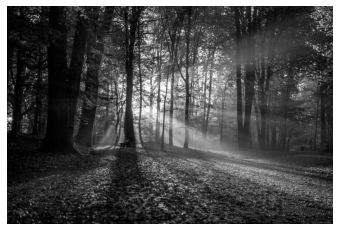

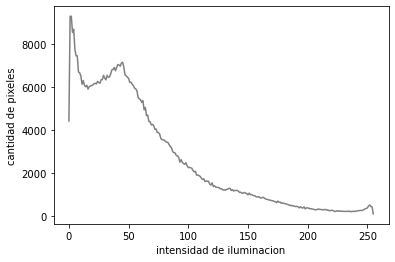

In [26]:
import cv2 as cv
import matplotlib.pyplot as plt

#Leer la imagen
src = cv.imread('Imagen_test/resta1.jpg')
#Convertir a grises
src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(src, cmap='gray')
plt.axis('off')

# Calculo del histograma
hist = cv.calcHist([src], [0], None, [256], [0, 256])
plt.figure()
plt.plot(hist, color='gray' )
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

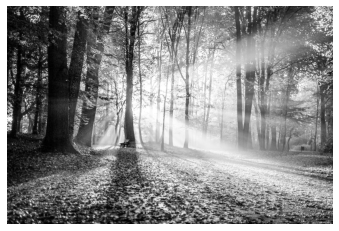

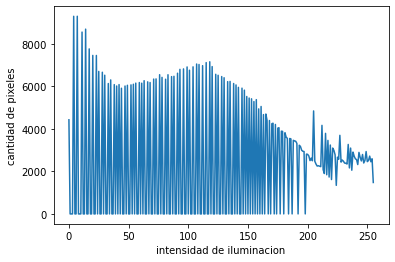

-1

In [24]:
dst = cv.equalizeHist(src)
plt.figure()
plt.imshow(dst, cmap='gray')
plt.axis('off')

# Calculo del histograma
hist2 = cv.calcHist([dst], [0], None, [256], [0, 256])
plt.figure()
plt.plot(hist2)
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

## Calcular histograma de imagen a color
También es posible calcular el histograma de una imagen a color, lo que obtenemos es una gráfica que muestra la frecuencia con la que aparecen los distintos niveles de cada uno de los canales, azul, verde y rojo, el código es similar al anterior, solo debemos asegurarnos de recorrer y calcular cada uno de los histogramas para cada canal.

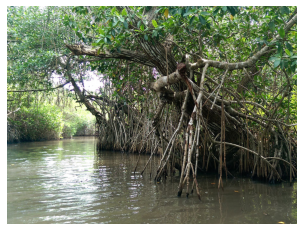

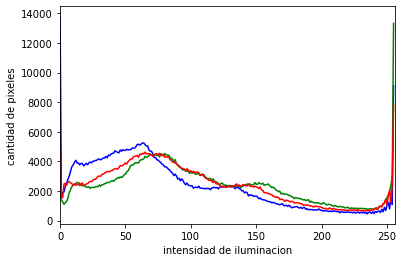

In [25]:
img = cv.imread('Imagen_test/Manglar2.jpg')
plt.figure()
img_plot = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_plot)
plt.axis('off') 
color = ('b','g','r')
plt.figure()
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
    
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()